In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_trials_df = pd.read_csv("./data/mouse_drug_data.csv")
clinical_trials_df = pd.read_csv("./data/clinicaltrial_data.csv")

# Combine the data into a single dataset
all_trials_df = pd.merge(mouse_trials_df, clinical_trials_df, on = ["Mouse ID", "Mouse ID"])

# Display the data table for preview
all_trials_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
mean_tumor_volume_gp = all_trials_df.groupby(["Drug", "Timepoint"]).mean()[["Tumor Volume (mm3)"]]
# Double brackets are StackOverflow's idea to make a groupby object into a dataframe in one line.

mean_tumor_volume_gp = mean_tumor_volume_gp.reset_index()

# Preview new dataframe
mean_tumor_volume_gp

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [17]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Define standard errors
from scipy.stats import sem

standard_errors = all_trials_df.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
standard_errors = standard_errors.reset_index()
standard_error_pivot = standard_errors.pivot(index = "Timepoint",
                                        columns = "Drug",
                                        values = "Tumor Volume (mm3)")
standard_error_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [11]:
# Minor Data Munging to Re-Format the Data Frames
mean_pivot = mean_tumor_volume_gp.pivot(index = "Timepoint",
                                        columns = "Drug",
                                        values = "Tumor Volume (mm3)")

# Preview that Reformatting worked
mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


No handles with labels found to put in legend.


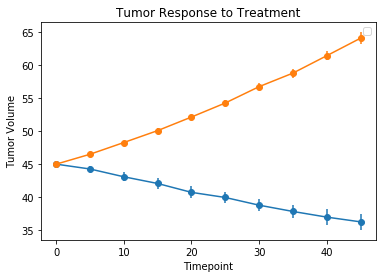

In [21]:
# Generate the Plot (with Error Bars)
plt.errorbar(mean_pivot.index, mean_pivot["Capomulin"], standard_error_pivot["Capomulin"], fmt = 'o', linestyle = 'solid')
plt.errorbar(mean_pivot.index, mean_pivot["Ceftamin"], standard_error_pivot["Ceftamin"], fmt = 'o', linestyle = 'solid')
plt.title("Tumor Response to Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.legend(loc="best")

# Save the Figure
plt.savefig("Tumor_Response.png")


In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [27]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
metastasis_gp = all_trials_df.groupby(["Drug", "Timepoint"]).mean()[["Metastatic Sites"]]
# Double brackets are StackOverflow's idea to make a groupby object into a dataframe in one line.

# Preview new dataframe

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [29]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
drug_name_meta = all_trials_df["Drug"]
time_point_meta = all_trials_df["Timepoint"]
standard_error_meta = all_trials_df.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]


In [7]:
# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [ ]:
# Minor Data Munging to Re-Format the Data Frames
metastasis_gp.pivot(index = "Timepoint",
                            columns = "Drug",
                            values = "Metastatic Sites")

# Preview that Reformatting worked
metastasis_gp.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [ ]:
# Generate the Plot (with Error Bars)
plt.errorbar("Drug", "Metastatic Sites", standard_errors, fmt = 'o')
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Drug Used")
plt.ylabel("Metastatic Sites")
plt.legend(loc="best")

# Save the Figure
plt.savefig(Metastatic_Sites.png)

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = all_trials_df.groupby(["Drug", "Timepoint"]).countn()[["Mouse ID"]]
# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames
mice_count.pivot(index = "Timepoint",
                            columns = "Drug",
                            values = mice_count)

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)